<a href="https://colab.research.google.com/github/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/main/IntDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn.metrics

In [3]:
pip install scikit-plot

In [2]:
import pandas as pd # For DataFrames, Series, and reading csv data in.
import seaborn as sns # Graphing, built ontop of MatPlot for ease-of-use and nicer diagrams.
import matplotlib.pyplot as plt # MatPlotLib for graphing data visually. Seaborn more likely to be used.
import numpy as np # For manipulating arrays and changing data into correct formats for certain libraries
import sklearn # For Machine Learning algorithms
import scikitplot # Confusion matrix plotting
from sklearn.decomposition import PCA # For PCA dimensionality reduction technique
from sklearn.preprocessing import StandardScaler # For scaling to unit scale, before PCA application
from sklearn.preprocessing import LabelBinarizer # For converting categorical data into numeric, for modeling stage
from sklearn.model_selection import StratifiedKFold # For optimal train_test splitting, for model input data
from sklearn.model_selection import train_test_split # For basic dataset splitting
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors ML classifier (default n. of neighbors = 5)
from scikitplot.metrics import plot_confusion_matrix # For plotting confusion matrices
from sklearn.metrics import accuracy_score # For getting the accuracy of a model's predictions
from sklearn.metrics import classification_report # Various metrics for model performance
from sklearn.neural_network import MLPClassifier # For Neural Network classifier
from sklearn.linear_model import LogisticRegression

In [4]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip?raw=true -O Friday-WorkingHours-Afternoon-PortScan.zip
!unzip -u Friday-WorkingHours-Afternoon-PortScan.zip
df1 = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.csv')
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

--2023-10-18 11:16:07--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip [following]
--2023-10-18 11:16:07--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Afternoon-PortScan.zi

In [5]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip?raw=true -O Friday-WorkingHours-Morning.zip
!unzip -u Friday-WorkingHours-Morning.zip
df2 = pd.read_csv('Friday-WorkingHours-Morning.csv')
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


--2023-10-18 11:16:10--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip?raw=true
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip [following]
--2023-10-18 11:16:11--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/b32206309e060f27f4c101783b7efa6b26cfea15/Friday-WorkingHours-Morning.zip [following]
--2023-10-18 11:16:11--  https

In [6]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip?raw=true -O Friday-WorkingHours-Afternoon-DDos.zip
!unzip -u Friday-WorkingHours-Afternoon-DDos.zip
df3 = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.csv')
#df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

--2023-10-18 11:16:14--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip [following]
--2023-10-18 11:16:14--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/174a7cae470ccfb842678836d044ef9d92d7b662/Friday-WorkingHours-Afternoon-DDos.zip [following]
--

In [7]:
!wget https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip?raw=true -O Thursday-WorkingHours-Morning-WebAttacks.zip
!unzip -u Thursday-WorkingHours-Morning-WebAttacks.zip
df4 = pd.read_csv('Thursday-WorkingHours-Morning-WebAttacks.csv')

--2023-10-18 11:16:17--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/blob/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip [following]
--2023-10-18 11:16:17--  https://github.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/raw/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAttacks.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/bharadwajkastur1/Drift-Detection-in-Cyber-Security/130048991ba40eed7b04999714484a14d2c38ad3/Thursday-WorkingHours-Morning-WebAt

In [8]:
import re
df=pd.concat([df1,df2,df3,df4])
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.replace('[^a-zA-Z0-9 \n\.]', '')


<ipython-input-8-c0809fd0763f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9 \n\.]', '')


In [9]:
df.shape

(873611, 79)

In [10]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,minsegsizeforward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
print ('BENIGN types: ', len(df.loc[df['Label']=='BENIGN']))
print ('Fraction of BENIGN types:', float(len(df.loc[df['Label']=='BENIGN'])/df.shape[0]))

BENIGN types:  582508
Fraction of BENIGN types: 0.6667818972059647


In [12]:
"""df.replace('Infinity', -1, inplace=True)
df[["FlowBytes/s", "FlowPackets/s"]] = df[["FlowBytes/s", "FlowPackets/s"]].apply(pd.to_numeric)
df.replace([np.inf, -np.inf, np.nan], -1, inplace=True)"""

'df.replace(\'Infinity\', -1, inplace=True)\ndf[["FlowBytes/s", "FlowPackets/s"]] = df[["FlowBytes/s", "FlowPackets/s"]].apply(pd.to_numeric)\ndf.replace([np.inf, -np.inf, np.nan], -1, inplace=True)'

In [13]:
df[df.isin([np.nan, np.inf, -np.inf]).any(1)]

<ipython-input-13-5de344eb8b77>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.isin([np.nan, np.inf, -np.inf]).any(1)]


,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,minsegsizeforward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
248,5002,0,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
5005,54304,0,2,0,37,0,31,6,18.5,17.67767,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
11482,7046,0,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
12824,13370,0,2,0,0,0,0,0,0.0,0.00000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
12827,52508,0,1,1,0,0,0,0,0.0,0.00000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165266,52279,0,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
165268,52281,0,1,1,6,6,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
166094,443,0,2,0,12,0,6,6,6.0,0.00000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
168343,58656,0,2,0,0,0,0,0,0.0,0.00000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
df = df[indices_to_keep]

<ipython-input-14-4cf9c491b15e>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [15]:
df.shape

(872949, 79)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873611 entries, 0 to 170365
Data columns (total 79 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   DestinationPort          873611 non-null  int64  
 1   FlowDuration             873611 non-null  int64  
 2   TotalFwdPackets          873611 non-null  int64  
 3   TotalBackwardPackets     873611 non-null  int64  
 4   TotalLengthofFwdPackets  873611 non-null  int64  
 5   TotalLengthofBwdPackets  873611 non-null  int64  
 6   FwdPacketLengthMax       873611 non-null  int64  
 7   FwdPacketLengthMin       873611 non-null  int64  
 8   FwdPacketLengthMean      873611 non-null  float64
 9   FwdPacketLengthStd       873611 non-null  float64
 10  BwdPacketLengthMax       873611 non-null  int64  
 11  BwdPacketLengthMin       873611 non-null  int64  
 12  BwdPacketLengthMean      873611 non-null  float64
 13  BwdPacketLengthStd       873611 non-null  float64
 14  Flow

In [17]:
df['Label'].replace("Web.*", "WebAttack", regex=True, inplace=True)

In [18]:
df_labels = np.unique(df['Label'].values).tolist()
df_no_labels = df.drop('Label', axis=1, inplace=False)
df_features = df_no_labels.columns.tolist()

print("Labels: ", df_labels)
print("Features: ", df_features)


Labels:  ['BENIGN', 'Bot', 'DDoS', 'PortScan', 'WebAttack']
Features:  ['DestinationPort', 'FlowDuration', 'TotalFwdPackets', 'TotalBackwardPackets', 'TotalLengthofFwdPackets', 'TotalLengthofBwdPackets', 'FwdPacketLengthMax', 'FwdPacketLengthMin', 'FwdPacketLengthMean', 'FwdPacketLengthStd', 'BwdPacketLengthMax', 'BwdPacketLengthMin', 'BwdPacketLengthMean', 'BwdPacketLengthStd', 'FlowBytess', 'FlowPacketss', 'FlowIATMean', 'FlowIATStd', 'FlowIATMax', 'FlowIATMin', 'FwdIATTotal', 'FwdIATMean', 'FwdIATStd', 'FwdIATMax', 'FwdIATMin', 'BwdIATTotal', 'BwdIATMean', 'BwdIATStd', 'BwdIATMax', 'BwdIATMin', 'FwdPSHFlags', 'BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags', 'FwdHeaderLength', 'BwdHeaderLength', 'FwdPacketss', 'BwdPacketss', 'MinPacketLength', 'MaxPacketLength', 'PacketLengthMean', 'PacketLengthStd', 'PacketLengthVariance', 'FINFlagCount', 'SYNFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount', 'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount', 'DownUpRatio', 'AveragePacketSize', 'A

In [19]:
df['Label'].value_counts()

BENIGN       581984
PortScan     158804
DDoS         128025
WebAttack      2180
Bot            1956
Name: Label, dtype: int64

In [20]:
df.describe()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,actdatapktfwd,minsegsizeforward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin
count,872949.000000,8.729490e+05,872949.000000,872949.000000,8.729490e+05,8.729490e+05,872949.000000,872949.000000,872949.000000,872949.000000,...,872949.000000,872949.000000,8.729490e+05,8.729490e+05,8.729490e+05,8.729490e+05,8.729490e+05,8.729490e+05,8.729490e+05,8.729490e+05
mean,7934.711206,1.094613e+07,8.376951,9.446456,5.595264e+02,1.485388e+04,236.829436,20.263660,71.307129,83.846039,...,6.009994,25.670445,9.230347e+04,3.178165e+04,1.516486e+05,7.507337e+04,4.772773e+06,1.018026e+06,5.495357e+06,4.020896e+06
std,17442.706966,2.894731e+07,714.208802,956.829751,5.411897e+03,2.177858e+06,1037.270781,88.362937,275.443505,429.658943,...,682.883408,7.117723,6.919467e+05,3.376740e+05,9.859835e+05,6.404186e+05,1.532854e+07,6.821543e+06,1.766147e+07,1.430809e+07
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,53.000000,8.000000e+01,1.000000,1.000000,6.000000e+00,6.000000e+00,6.000000,0.000000,4.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,3.092600e+04,2.000000,2.000000,4.300000e+01,9.200000e+01,23.000000,2.000000,12.333333,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2161.000000,1.754828e+06,4.000000,4.000000,8.800000e+01,3.440000e+02,48.000000,33.000000,45.000000,10.263203,...,3.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65532.000000,1.200000e+08,207964.000000,284602.000000,1.235152e+06,6.270000e+08,24820.000000,2325.000000,5940.857143,7049.469004,...,198636.000000,60.000000,1.100000e+08,7.050000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.660000e+07,1.200000e+08,1.200000e+08


In [21]:
string_features = list(df.select_dtypes(include=['object']).columns)
string_features.remove('Label')
string_features

[]

<Axes: >

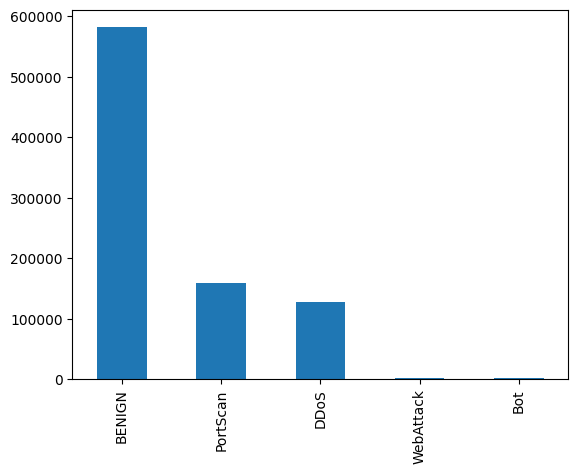

In [22]:
df['Label'].value_counts()[:20].plot(kind='bar')

In [23]:
df.replace(to_replace=['Bot','DDoS','PortScan','WebAttack'], value="ATTACK", inplace=True)

In [24]:
benign_total = len(df[df['Label'] == "BENIGN"])
print("Benign: ", benign_total)
attack_total = len(df[df['Label'] != "BENIGN"])
print("Attack: ", attack_total)

Benign:  581984
Attack:  290965


<Axes: >

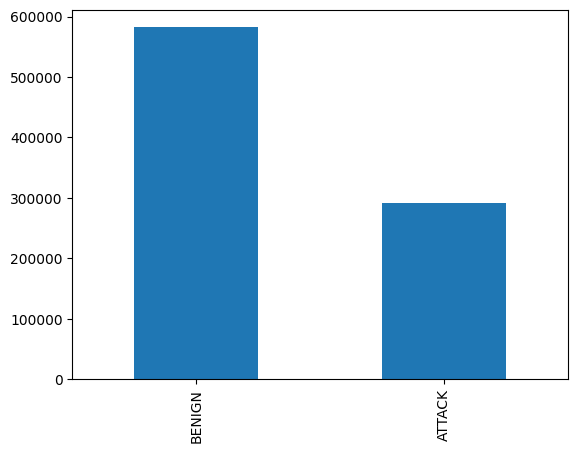

In [25]:
df['Label'].value_counts()[:20].plot(kind='bar')

In [26]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X=df.drop(["Label"], axis=1)
y=df["Label"]

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
df = pd.concat([X_balanced, y_balanced], axis=1)
df['Label'].value_counts()

BENIGN    581984
ATTACK    581984
Name: Label, dtype: int64

In [27]:
#drop the constant columns (which varience is 0)

variances = df.var(numeric_only=True)
constant_columns = variances[variances == 0].index
df = df.drop(constant_columns, axis=1)

print(constant_columns)
print (df.shape)


Index(['BwdPSHFlags', 'FwdURGFlags', 'BwdURGFlags', 'CWEFlagCount',
       'FwdAvgBytesBulk', 'FwdAvgPacketsBulk', 'FwdAvgBulkRate',
       'BwdAvgBytesBulk', 'BwdAvgPacketsBulk', 'BwdAvgBulkRate'],
      dtype='object')
(1163968, 69)


In [28]:
#drop duplicate columns

duplicates = set()
for i in range(0, len(df.columns)):
    col1 = df.columns[i]
    for j in range(i+1, len(df.columns)):
        col2 = df.columns[j]
        if(df[col1].equals(df[col2])):
            duplicates.add(col2)

print (duplicates)
df.drop(duplicates, axis=1, inplace=True)
print (df.shape)

{'ECEFlagCount', 'AvgFwdSegmentSize', 'SYNFlagCount', 'FwdHeaderLength.1', 'SubflowFwdBytes', 'SubflowBwdPackets', 'SubflowFwdPackets'}
(1163968, 62)


In [29]:
df['Label'] = df['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [30]:
df['Label'].value_counts()

0    581984
1    581984
Name: Label, dtype: int64

In [31]:
df.head()

,DestinationPort,FlowDuration,TotalFwdPackets,TotalBackwardPackets,TotalLengthofFwdPackets,TotalLengthofBwdPackets,FwdPacketLengthMax,FwdPacketLengthMin,FwdPacketLengthMean,FwdPacketLengthStd,...,minsegsizeforward,ActiveMean,ActiveStd,ActiveMax,ActiveMin,IdleMean,IdleStd,IdleMax,IdleMin,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,0


<Axes: >

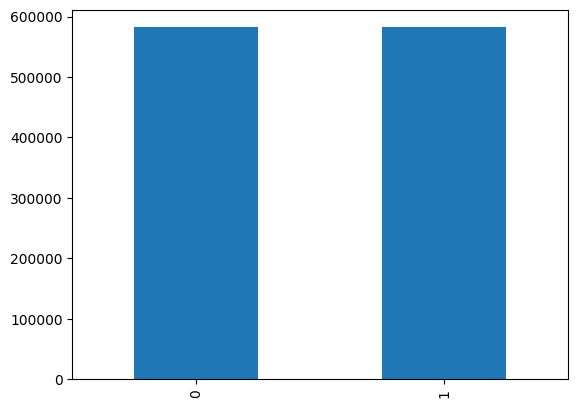

In [32]:
df['Label'].value_counts()[:20].plot(kind='bar')

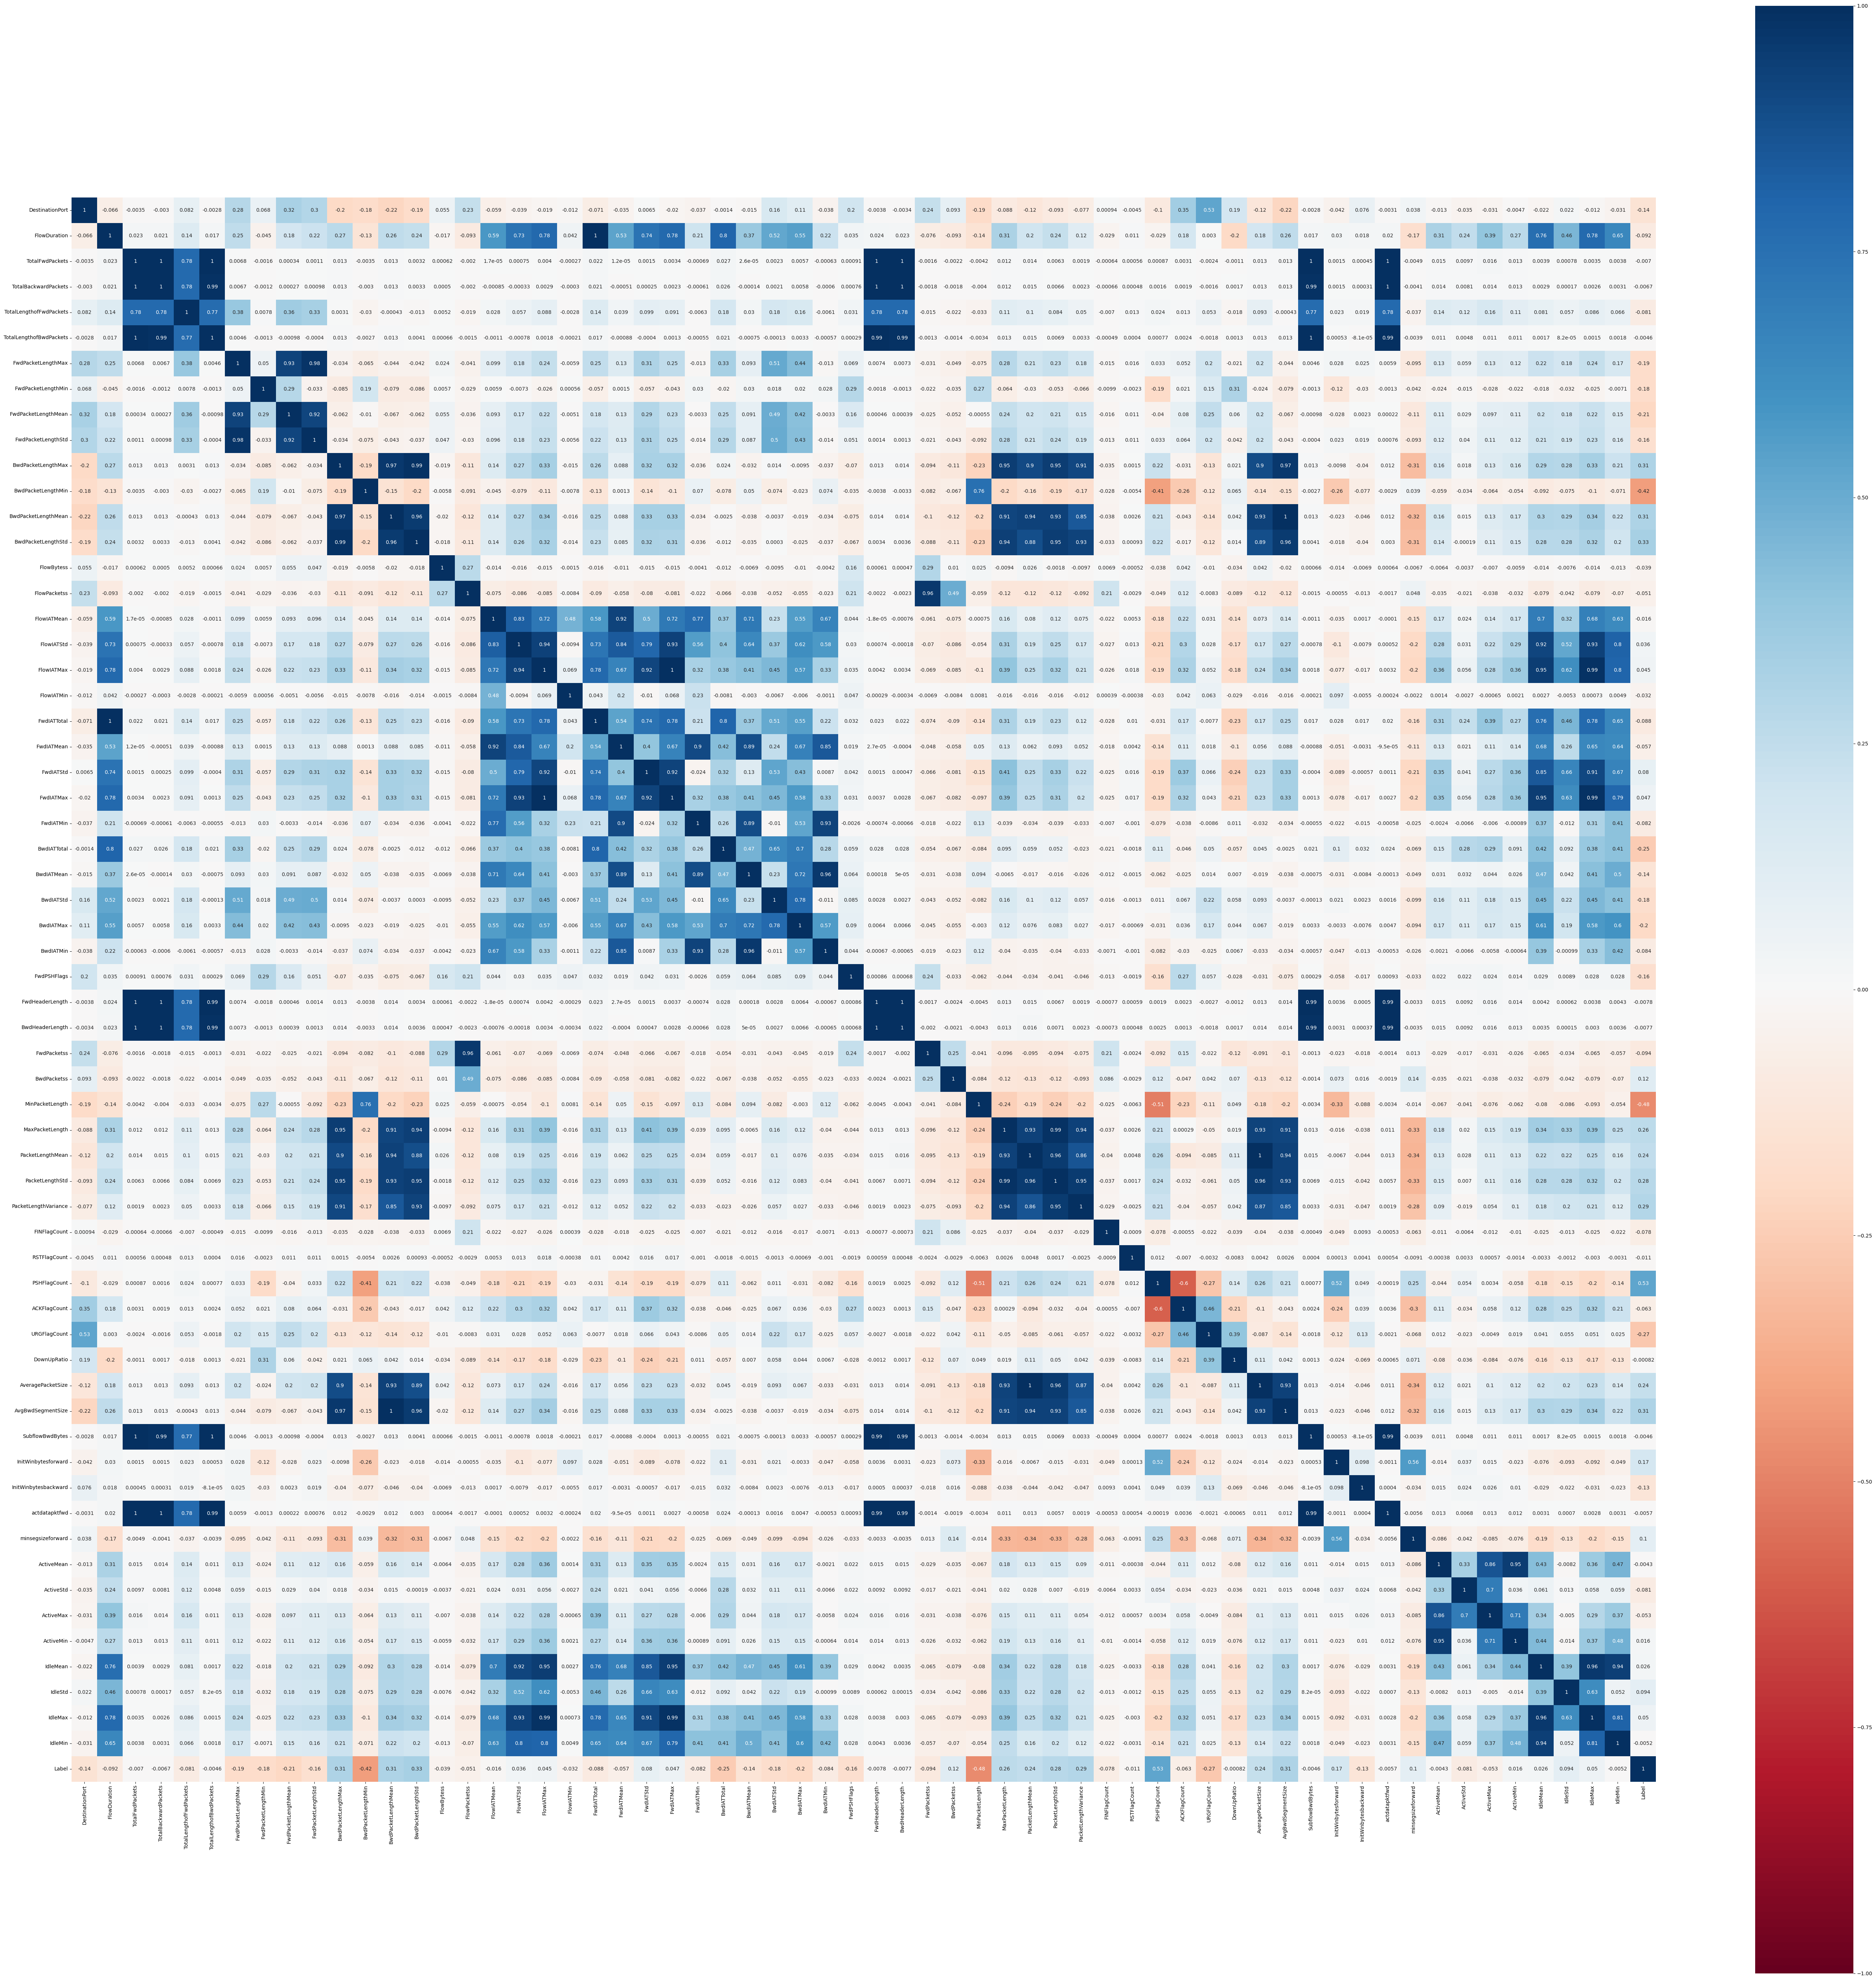

In [33]:
# pearson correlation heatmap
plt.figure(figsize=(70, 70))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [37]:
correlated_col = set()
is_correlated = [True] * len(corr.columns)
threshold = 0.70
for i in range (len(corr.columns)):
    if(is_correlated[i]):
        for j in range(i):
          if (corr.iloc[i, j] >= threshold) and (is_correlated[j]):
            colname = corr.columns[j]
            is_correlated[j]=False
            correlated_col.add(colname)

print(correlated_col)
print(len(correlated_col))

{'TotalLengthofFwdPackets', 'PacketLengthVariance', 'BwdIATStd', 'ActiveMax', 'IdleMax', 'FwdIATTotal', 'BwdPacketLengthMin'}
7


In [39]:
df.drop(correlated_col, axis=1, inplace=True)
print (df.shape)

KeyError: ignored

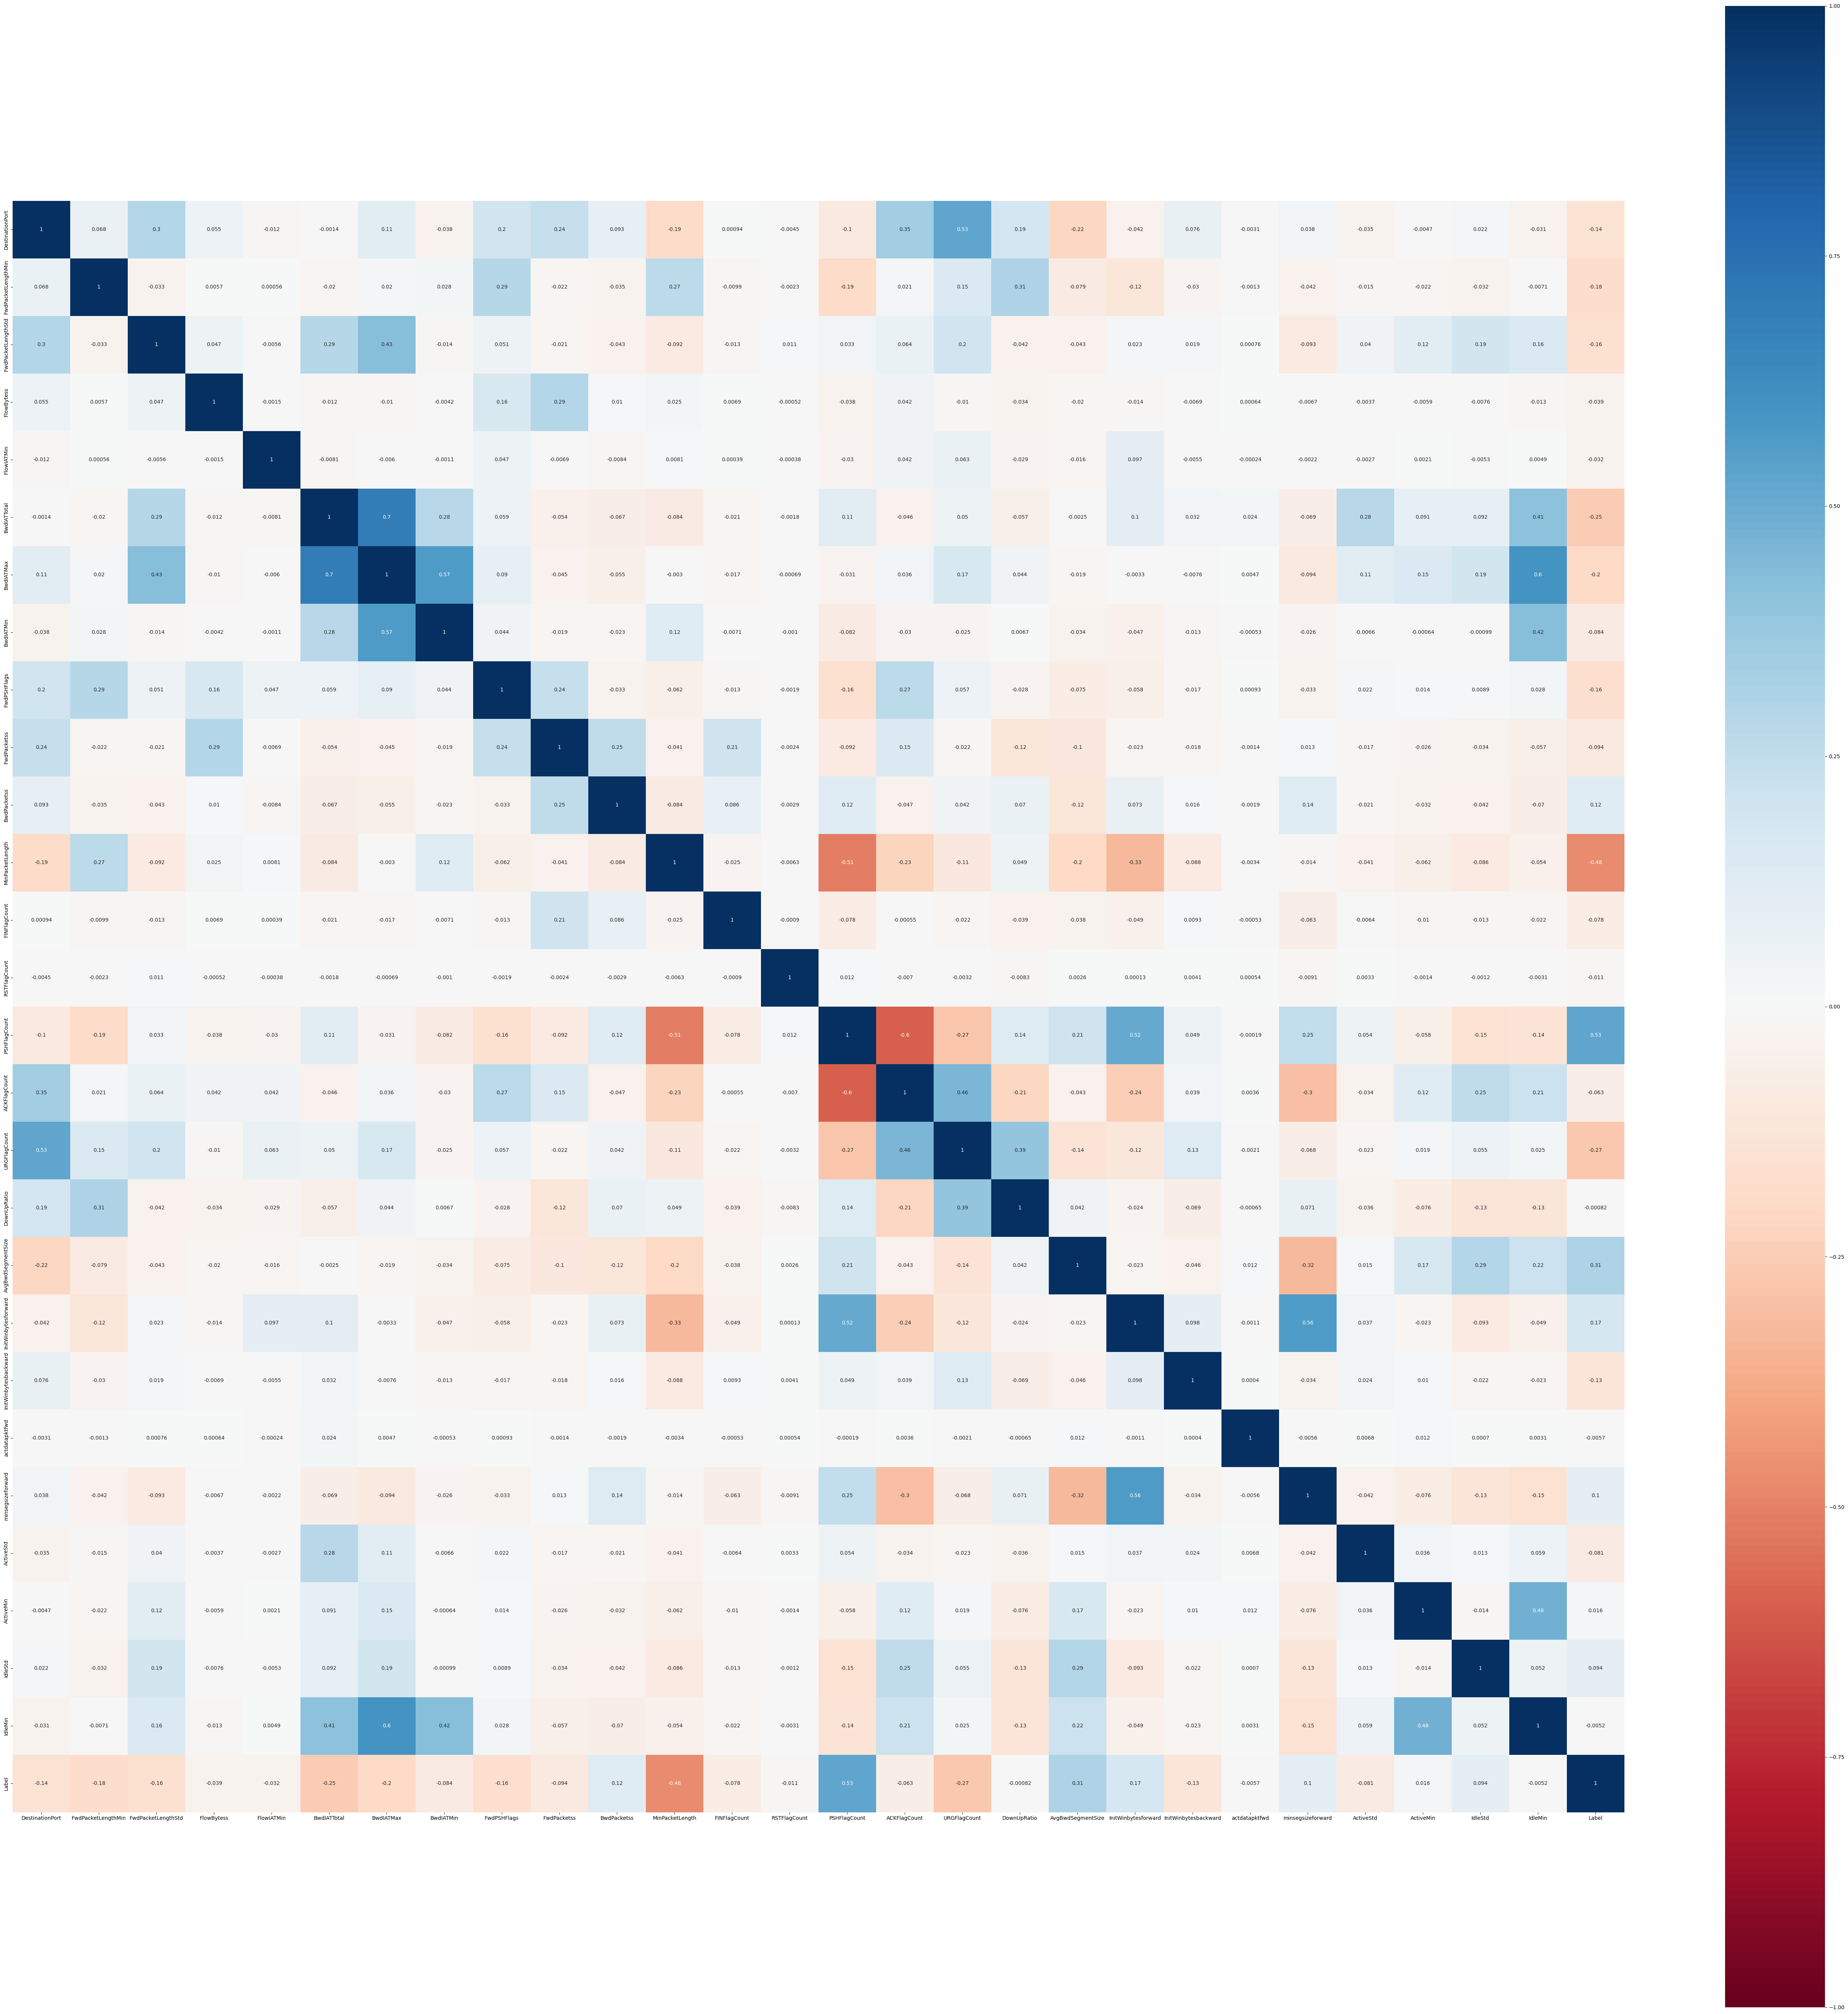

In [40]:
plt.figure(figsize=(70, 70))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='RdBu', vmin=-1, vmax=1, square=True) # annot=True
plt.show()

In [41]:
df.to_csv('cic_preprocessed.csv', index=False)

In [3]:
df = pd.read_csv('cic_preprocessed.csv')

In [4]:
df.shape

(1163968, 28)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163968 entries, 0 to 1163967
Data columns (total 28 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   DestinationPort       1163968 non-null  int64  
 1   FwdPacketLengthMin    1163968 non-null  int64  
 2   FwdPacketLengthStd    1163968 non-null  float64
 3   FlowBytess            1163968 non-null  float64
 4   FlowIATMin            1163968 non-null  int64  
 5   BwdIATTotal           1163968 non-null  int64  
 6   BwdIATMax             1163968 non-null  int64  
 7   BwdIATMin             1163968 non-null  int64  
 8   FwdPSHFlags           1163968 non-null  int64  
 9   FwdPacketss           1163968 non-null  float64
 10  BwdPacketss           1163968 non-null  float64
 11  MinPacketLength       1163968 non-null  int64  
 12  FINFlagCount          1163968 non-null  int64  
 13  RSTFlagCount          1163968 non-null  int64  
 14  PSHFlagCount          1163968 non-

In [6]:
numeric_columns = ['DestinationPort', 'FwdPacketLengthMin', 'FwdPacketLengthStd',
       'FlowBytess', 'FlowIATMin', 'BwdIATTotal', 'BwdIATMax', 'BwdIATMin',
       'FwdPSHFlags', 'FwdPacketss', 'BwdPacketss', 'MinPacketLength',
       'FINFlagCount', 'RSTFlagCount', 'PSHFlagCount', 'ACKFlagCount',
       'URGFlagCount', 'DownUpRatio', 'AvgBwdSegmentSize',
       'InitWinbytesforward', 'InitWinbytesbackward', 'actdatapktfwd',
       'minsegsizeforward', 'ActiveStd', 'ActiveMin', 'IdleStd', 'IdleMin']

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

rbst = RobustScaler()
df[numeric_columns] = rbst.fit_transform(df[numeric_columns])

In [8]:
df.head()

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,FlowBytess,FlowIATMin,BwdIATTotal,BwdIATMax,BwdIATMin,FwdPSHFlags,FwdPacketss,...,AvgBwdSegmentSize,InitWinbytesforward,InitWinbytesbackward,actdatapktfwd,minsegsizeforward,ActiveStd,ActiveMin,IdleStd,IdleMin,Label
0,-0.018193,-0.333333,19.421496,-0.062947,-0.448276,5.263964,2.386722,0.25,0.0,-0.002846,...,0.944382,3.469951,1.056522,11.5,1.0,0.0,0.0,0.0,0.0,0
1,-0.018193,-0.333333,19.421496,-0.064704,-0.431034,6.022196,2.391262,0.25,0.0,-0.002921,...,0.944382,3.469951,1.056522,11.5,1.0,0.0,0.0,0.0,0.0,0
2,-0.018193,-0.333333,0.000000,-0.106661,2.310345,0.000000,0.000000,0.00,0.0,0.351601,...,-0.037267,-0.090394,1.056522,-0.5,1.0,0.0,0.0,0.0,0.0,0
3,-0.018193,-0.333333,19.468408,-0.065323,-0.448276,5.747491,3.155079,0.00,0.0,-0.002899,...,0.943804,3.469951,1.056522,11.5,1.0,0.0,0.0,0.0,0.0,0
4,11.077792,-0.333333,0.000000,-0.106661,0.034483,0.000812,0.001118,12.25,0.0,0.735657,...,-0.037267,-0.096182,1.260870,-0.5,1.0,0.0,0.0,0.0,0.0,0


In [9]:
df_sample = df.groupby("Label", group_keys=False).apply(lambda x:x.sample(frac=0.2))

In [10]:
df_sample.Label.value_counts()

0    116397
1    116397
Name: Label, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop("Label", axis=1), df['Label'], test_size=0.3)

In [13]:
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

models = []
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('SVM', SVC(gamma='auto')))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=5)))
models.append(('RF', RandomForestClassifier(max_depth=5, n_estimators=5, max_features=3)))
#models.append(('ABoost', AdaBoostClassifier()))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=200)))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
#models.append(('MLP', MLPClassifier()))

print('Model\tAcc\tPr\tRecall\tF1\tExecution')

for name, model in models:
    start_time = time.time()
    kfold = model_selection.KFold(n_splits=5, random_state=24, shuffle = True)

    accuracy = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy').mean()
    precision = cross_val_score(model, x_train, y_train, cv=kfold, scoring='precision').mean()
    recall = cross_val_score(model, x_train, y_train, cv=kfold, scoring='recall').mean()
    f1_score = cross_val_score(model, df.drop("Label", axis=1), df["Label"], cv=kfold, scoring='f1_weighted').mean()

    delta = time.time() - start_time
    print('{}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.2f} secs'.format(name, accuracy, precision, recall, f1_score, delta))

Model	Acc	Pr	Recall	F1	Execution
Decision Tree	0.979	0.962	0.997	0.979	98.80 secs
RF	0.974	0.977	0.992	0.985	62.77 secs
LR	0.447	0.429	0.317	0.454	187.63 secs
NB	0.559	0.532	0.996	0.455	14.07 secs
LDA	0.907	0.850	0.989	0.907	94.07 secs
QDA	0.940	0.897	0.994	0.939	49.68 secs


In [25]:
from sklearn.naive_bayes import BernoulliNB

#MODEL FIT
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(x_train, y_train);

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(x_train, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(x_train, y_train)

BernoulliNB()

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
#models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, x_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(x_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(x_train))
    classification = metrics.classification_report(y_train, v.predict(x_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()

NameError: ignored

In [13]:
#MODEL PERFORMANCE ON TEST DATA
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(x_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(x_test))
    classification = metrics.classification_report(y_test, v.predict(x_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.7717266481667626

Confusion matrix:
 [[157411  17400]
 [ 62311 112069]]

Classification report:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80    174811
           1       0.87      0.64      0.74    174380

    accuracy                           0.77    349191
   macro avg       0.79      0.77      0.77    349191
weighted avg       0.79      0.77      0.77    349191



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.4457675025988642

Confusion matrix:
 [[100980  73831]
 [119702  54678]]

Classification report:
               precision    recall  f1-score   support

           0       0.46      0.58      0.51    174811
           1       0.43      0.31      0.36    174380

    accuracy                           0.45    349191
   macro avg   

In [14]:
#CALCULATING THE PERCENTAGE OF INCORRENT PREDICTIONS OF THE MODELS
from sklearn.metrics import hamming_loss

for i, v in models:
    y_pred = v.predict(x_test)
    h_loss = hamming_loss(y_test, y_pred)

    print()
    print('============================== {} Percentage of INCORRECT Predictions =============================='.format(i))
    print()
    print ("Hamming Loss:" ,h_loss*100)
    print()


============================== Naive Baye Classifier Percentage of INCORRECT Predictions ==============================

Hamming Loss: 22.82733518332374


============================== LogisticRegression Percentage of INCORRECT Predictions ==============================

Hamming Loss: 55.423249740113576



In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3, n_estimators=50, random_state=42, oob_score=True)
# rfc = RandomForestClassifier(n_estimators=250, random_state=1)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=17, max_features=10, min_samples_leaf=3,
                       n_estimators=50, oob_score=True, random_state=42)

In [15]:
features = x_train.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

for index, i in enumerate(indices[:10]):
    print('{}.\t#{}\t{:.3f}\t{}'.format(index + 1, i, importances[i], features[i]))

1.	#19	0.233	InitWinbytesforward
2.	#2	0.166	FwdPacketLengthStd
3.	#20	0.130	InitWinbytesbackward
4.	#1	0.094	FwdPacketLengthMin
5.	#21	0.062	actdatapktfwd
6.	#11	0.046	MinPacketLength
7.	#16	0.035	URGFlagCount
8.	#0	0.034	DestinationPort
9.	#3	0.028	FlowBytess
10.	#14	0.026	PSHFlagCount


In [16]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

y_pred = rfc.predict(x_test)
confusion_matrix(y_test, y_pred)
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('Accuracy =', accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 =', f1)

Accuracy = 0.9988716776778325
Precision = 0.9987802783026971
Recall = 0.9989633329133208
F1 = 0.9988717972212995
